# Homework 3: Data Prep & Change Detection

### Michael Ahn

## Question 5.1

In [1]:
# Install outliers library
library(outliers)
library(ggplot2)

 __Read in US crime data__

In [2]:
df_crime <- read.table('uscrime.txt', header=TRUE)
Crime <- df_crime$Crime
head(df_crime,3)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578


__Let's just see what Grubbs Test is all about__

Performing Grubbs test with  
1. null hypothesis: there is no outlier in the data set
2. null hypothesis: there is (exactly) one outlier in the data set

In [3]:
# 1. Right Tail Test
grubbs.test(df_crime$Crime, type=10, opposite=TRUE)


	Grubbs test for one outlier

data:  df_crime$Crime
G = 1.45590, U = 0.95292, p-value = 1
alternative hypothesis: lowest value 342 is an outlier


In [4]:
# Left Tail Test
grubbs.test(df_crime$Crime, type=10)


	Grubbs test for one outlier

data:  df_crime$Crime
G = 2.81290, U = 0.82426, p-value = 0.07887
alternative hypothesis: highest value 1993 is an outlier


Since p > 0.05, we accept both the right and left end null hypotheses and conclude that there are no outliers.  
It looks like the higher end value is much closer to a rejection of the null hypothesis. Let us look more carefully at the data.

__Validating Grubbs Test - Normality Check__

The Grubbs Test checks for outliers on univariate, Normally distributed data. The latter condition is assumed for the Grubbs Test, meaning the test falls through if the data is not actually Normal.  
Let us try some graphical and then statistical tests to determine this.

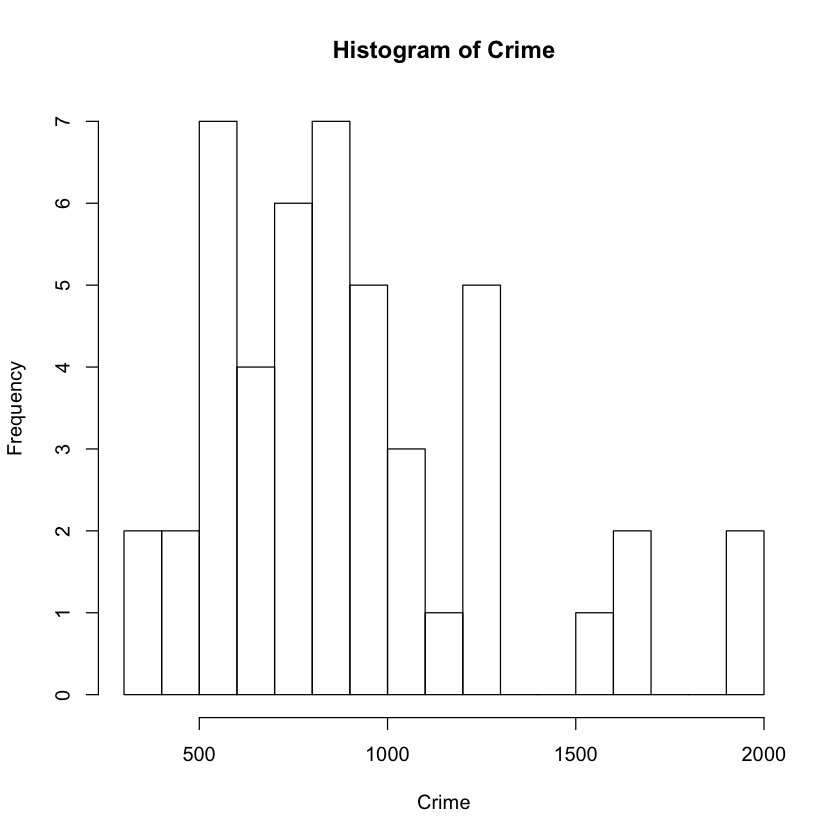

In [5]:
hist(Crime,breaks=12)

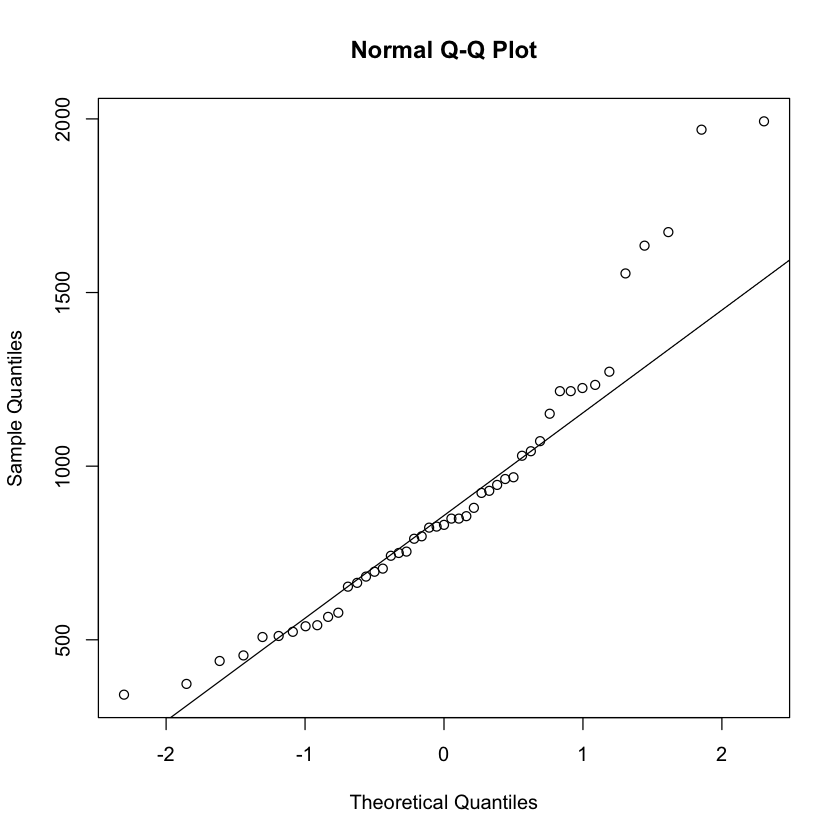

In [6]:
qqnorm(Crime, plot.it = TRUE)
qqline(Crime)

In both cases, it looks like the upper end of the Crime data is more ostracized from the rest of the data.  

The histogram shows a right skew, but histograms are not the best forms of visualization given the number of bins necessary that may hide trends.  
A fairly powerful visualization is the QQ-Plot. A Normally distributed dataset should have the points follow fairly close to the qqline.  
  
Maybe the problem with the Grubbs Test is that the data cannot really be considered Normally distributed.

Shapiro-Wilk Normality Test  
1. Null Hypothesis: The data set is Normally distributed  
2. Alternate Hypothesis: The data is NOT Normally distributed

In [7]:
shapiro.test(Crime)


	Shapiro-Wilk normality test

data:  Crime
W = 0.91273, p-value = 0.001882


A simple Shapiro test concludes to reject the null hypothesis with p = 0.001882 and conclude that the data set is not Normally distributed.

__Improving Grubbs Test - Lognormal Distributions__

A "lognormal" distribution is one that becomes Normal when a log transformation is applied to it. Usually you can see this in the case of right skewed distributions that would otherwise be somewhat Normal

Log transformations help "Normalize" right skew distributions  since log() functions scale an input down exponentially and will thus have a stronger affect on larger numbers. Let us try to use the Grubbs Test again on this supposedly Normal data set.

In [8]:
Crime.log <- log(Crime)
shapiro.test(Crime.log)


	Shapiro-Wilk normality test

data:  Crime.log
W = 0.98709, p-value = 0.8778


With a p-value of 0.8778, we can accept the null hypothesis and conclude that Crime.log follows a Normal distribution.

In [9]:
grubbs.test(Crime.log, type=10, opposite=TRUE)


	Grubbs test for one outlier

data:  Crime.log
G = 2.12250, U = 0.89994, p-value = 0.712
alternative hypothesis: highest value 7.59739632021279 is an outlier


In [10]:
grubbs.test(Crime.log, type=10)


	Grubbs test for one outlier

data:  Crime.log
G = 2.16540, U = 0.89585, p-value = 0.6329
alternative hypothesis: lowest value 5.8348107370626 is an outlier


Again, we accept the null hypothesis for both the smallest and largest values in the Crime.log data set and conclude that there are no outliers

__BUT WAIT__

Let us quickly examine other ways to see what may be an "outlier".

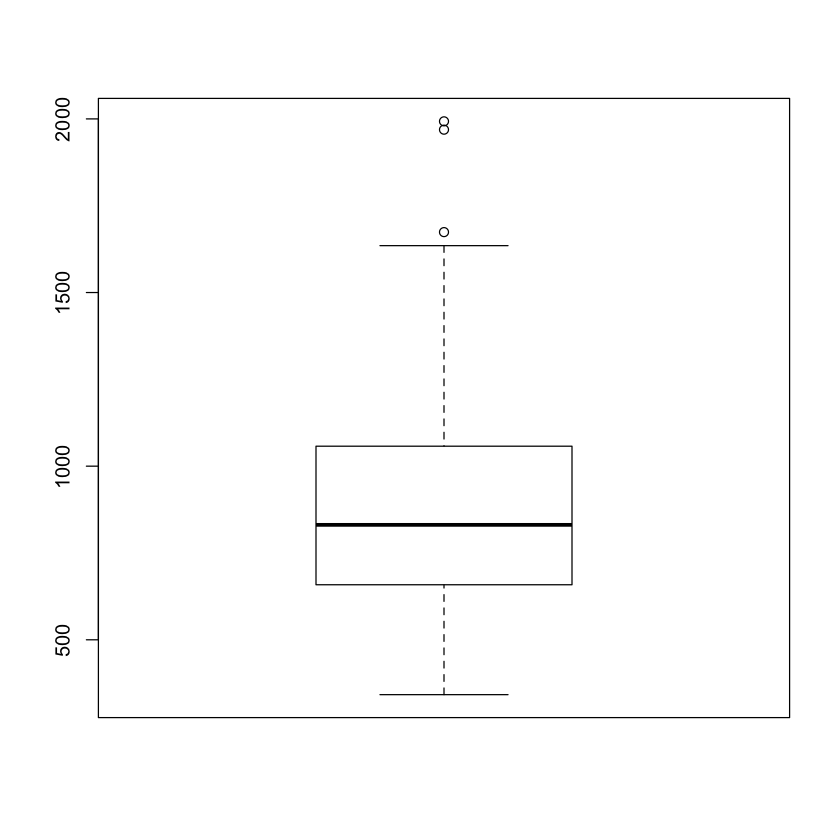

In [11]:
boxplot(Crime)

In this case, an elementary box-and-whisker plot shows that there are 3 data points more than 1.5 * IRQ (Interquartile Range) from the mean. This can be an outlier depending on how we define an outlier - considering that this data refers to numbebr of crimes per capita, perhaps vasts amounts of crimes influentially leads to more crimes?

Let us look deeper at the data sets as they relate to other variables, since the data set consists of more than just the target variable.

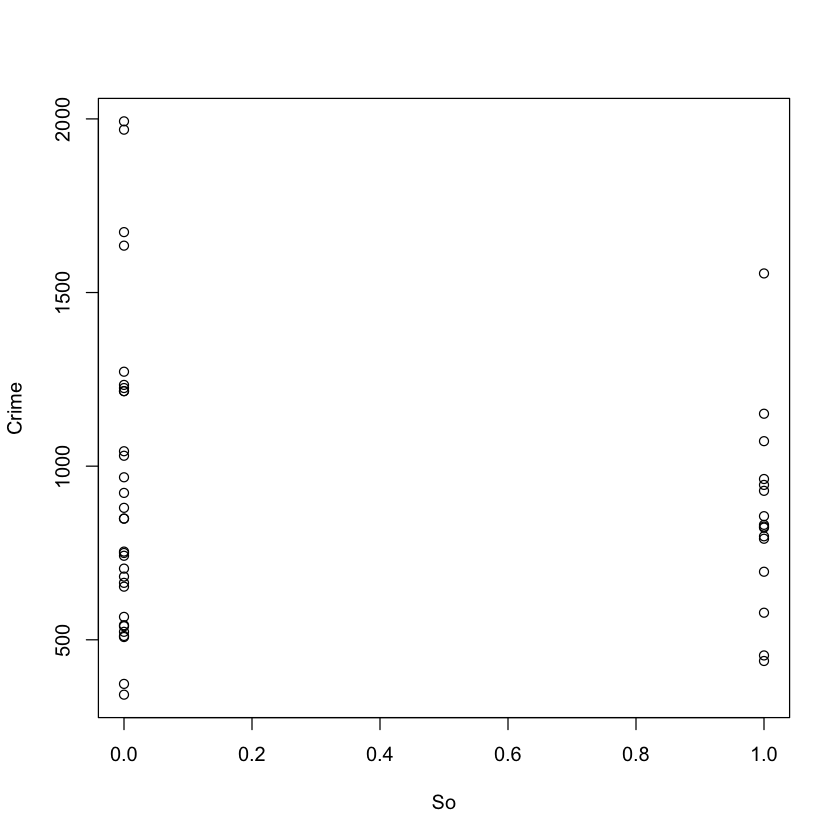

In [12]:
# South or North
i=2
plot(df_crime[,i], Crime,
     xlab=colnames(df_crime)[i])

In [13]:
# Split Crime by south or north
South <- Crime[df_crime$So == 1]
North <- Crime[df_crime$So == 0]

In [14]:
# Are both south vs north data sets still considered Normal?
shapiro.test(South); 
shapiro.test(North); shapiro.test(log(North))


	Shapiro-Wilk normality test

data:  South
W = 0.92652, p-value = 0.2146



	Shapiro-Wilk normality test

data:  North
W = 0.90584, p-value = 0.01012



	Shapiro-Wilk normality test

data:  log(North)
W = 0.97783, p-value = 0.7499


Conclude that North is lognormal, and South is normal

In [15]:
grubbs.test(log(North), type=10); grubbs.test(log(North), type=10, opposite=TRUE)


	Grubbs test for one outlier

data:  log(North)
G = 1.97670, U = 0.86542, p-value = 0.6565
alternative hypothesis: lowest value 5.8348107370626 is an outlier



	Grubbs test for one outlier

data:  log(North)
G = 1.89560, U = 0.87623, p-value = 0.8102
alternative hypothesis: highest value 7.59739632021279 is an outlier


In [16]:
grubbs.test(South, type=10); grubbs.test(South, type=10, opposite=TRUE)


	Grubbs test for one outlier

data:  South
G = 2.58420, U = 0.52512, p-value = 0.02519
alternative hypothesis: highest value 1555 is an outlier



	Grubbs test for one outlier

data:  South
G = 1.54640, U = 0.82994, p-value = 0.8995
alternative hypothesis: lowest value 439 is an outlier


In this case, we saw that treating the Crime rates for the north vs the south yields different results. Specifically, there is an outlier in the South data (contextual outlier?) if we treat it as a Normal distribution and apply the Grubbs Test.
  
### Conclusion  
Other methods can yield more precise results depending on how we frame the question - with interquartile ranges, or by splitting the data set across a predictor variable, we were able to define and determine outliers differently than from the data set as a whole.  

## Question 6.1

My work often involves looking at minute-by-minute plots of the number of viewers for a particular television show's airing over its duration.  
There are usually two simultaneous trends for these plots - temporary dips for commercials and an overall decrease from start to finish. Change detection may help to see whether there is an unusually placed loss of viewers that could examine whether a scene in the tv show pushed the audience away.  
  
Since it is not costly to examine false alerts, a smaller C for sensitive detection may be more useful. In these cases, we can view each scene in the program and determine whether there was a significant change or not.  
T would be determined by looking at the general slope that already exists for these programs. For example, there will almost always be a decrease in viewers over time, the T would have to be lower than the average loss over time. 

## Question 6.2

In [17]:
df_temp <- read.table('temps.txt',header=TRUE)
head(df_temp,3)

DAY,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,⋯,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015
1-Jul,98,86,91,84,89,84,90,73,82,⋯,93,95,85,95,87,92,105,82,90,85
2-Jul,97,90,88,82,91,87,90,81,81,⋯,93,85,87,90,84,94,93,85,93,87
3-Jul,97,93,91,87,93,87,87,87,86,⋯,93,82,91,89,83,95,99,76,87,79


### 1. CUSUM for Summer's End

Since we are trying to determine when the summer ends for EACH year, I can assume that each year potentially has a different date for the end of summer. We can use a typical standard deviation from the data set to determine our parameters C and T.

In [18]:
# get_cusum(d, c)
#    @param d: data set to apply CUSUM to
#    @param c: regularizing coefficient - larger c means less sensitive CUSUM
#
#    @return s: all the CUSUM values in order
get_cusum <- function(d, c=0.5*sd(d)) {
    
    u <- mean(d)
    s <- c(0)
    
    # Use formula for detecting decrease
    for (i in 2:length(d)) {
        s[i] <- min(0, s[i-1] + (d[i] - u - c))
    }
    
    # Return array of St
    return(s)
}

In [19]:
# get_dates(df, c, t)
#    @param df: data set to apply CUSUM to
#    @param c: regularizing coefficient - larger c means less sensitive CUSUM
#    @param t: threshold coefficient - larger t means lenient threshold
#
#    @return Date: value of df$DAYS at which CUSUM breaches the threshold
get_dates <- function(df, c=0.5, t=-5) {
    
    # Iter over columns; store Dates
    col <- colnames(df)
    Date <- c(0)

    # Loop through columns
    for (i in 2:length(col)) {

        # Apply CUSUM on column using C
        d <- df_temp[,i]
        C <- c*sd(d)
        S <- get_cusum(d, C)
        
        # Threshold
        T <- t*sd(d)

        # Index of Cusum passing threshold
        boolList <- S<T
        index <- min(which(boolList == TRUE))

        date <- df_temp$DAY[index]
        Date[i] <- date
    }
    return(Date)
}

Let's play around with some values of C and T - a goal for classifying the end of summer should be fairly consistent.

In [20]:
for (C in c(0.1, 0.3, 0.5, 0.7, 0.9)) {
    for (T in c(1, 3, 5, 7, 9)) {
        print(sd(get_dates(df_temp, C, -T)))
    }
}

[1] 41.13827
[1] 31.80484
[1] 28.51541
[1] 32.21254
[1] 35.6916
[1] 41.32709
[1] 40.83124
[1] 34.21828
[1] 30.5105
[1] 31.0106
[1] 40.97235
[1] 45.35259
[1] 41.18084
[1] 37.92668
[1] 31.85353
[1] 40.06608
[1] 42.88162
[1] 44.87082
[1] 39.72645
[1] 41.02392
[1] 36.25413
[1] 44.24467
[1] 38.46507
[1] 37.64768
[1] 37.63629


In [21]:
index <- get_dates(df_temp, c=0.1, t=-5)
for (i in 2:length(index)) {
    datesp <- droplevels(df_temp$DAY[index[i]])
    print(datesp)
}

[1] 29-Aug
Levels: 29-Aug
[1] 18-Sep
Levels: 18-Sep
[1] 26-Sep
Levels: 26-Sep
[1] 2-Sep
Levels: 2-Sep
[1] 23-Oct
Levels: 23-Oct
[1] 18-Sep
Levels: 18-Sep
[1] 10-Sep
Levels: 10-Sep
[1] 22-Sep
Levels: 22-Sep
[1] 5-Aug
Levels: 5-Aug
[1] 26-Oct
Levels: 26-Oct
[1] 25-Aug
Levels: 25-Aug
[1] 21-Aug
Levels: 21-Aug
[1] 6-Sep
Levels: 6-Sep
[1] 21-Aug
Levels: 21-Aug
[1] 26-Sep
Levels: 26-Sep
[1] 27-Oct
Levels: 27-Oct
[1] 6-Sep
Levels: 6-Sep
[1] 2-Aug
Levels: 2-Aug
[1] 14-Sep
Levels: 14-Sep
[1] 2-Sep
Levels: 2-Sep


In this case, I choose the C and T with the lowest standard deviation. There are two reasons for this:  
1. Classifying wrong has no (obvious) repercussions  
2. Seasons should be fairly consistent over the years  

Since we are determining the end of summer based purely on temperature and with no "right or wrong" answers, there is no need to overthink the values for C and T in this hypothetical scenario. If we were an ice cream company, however, and wanted to choose a time to stop sending out ice cream trucks, we may want an easier threshold since people are less likely to buy ice cream and the threat of losing money is very detrimental. (Of course, other models and industry information would be required, this is my very simplistic assumption on ice cream trucks).   

  
This method involves looking for a C, T to use as a model parameter for determining the unofficial end of summer for future dates.

## Question 6.2

In [22]:
columns = colnames(df_temp)

In [23]:
# Get a list of mean temperatures
MeanTemps <- c(0)
MedTemps <- c(0)
for (i in 2:length(columns)) {
    u <- mean(df_temp[,i])
    med <- median(df_temp[,i])
    MeanTemps[i-1] <- u
    MedTemps[i-1] <- med
}

In [24]:
climate_change <- function(df) {
    u <- mean(df)
    s <- c(0)
    c <- 0.5*sd(df)
    for (i in 2:length(df)) {
        s[i] <- max(0, s[i-1] + (df[i] - u - c))
    }
    return(s)
} 

In [25]:
t <- 5*sd(MeanTemps)
climate_change(MeanTemps) > t

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [26]:
t <- 5*sd(MedTemps)
climate_change(MedTemps) > t

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

Using fairly lenient threshold values, it looks like the temperature has not gotten warmer. 

For this test, I would prefer to use stricter conditions to actually consider climate change to be active when looking at relatively short intervals. A better test would be conducted over many years and including data year-round. With that data, an easier set of parameters for determining climate change might be better since the implications of global climate change could be disastrous.  

  
As always, industry knowledge would be preferable to making such decisions. For example, adapting to a non-existant climate change would be extremely costly so we would not want false positives. However, not adapting to real climate change that does not look like it will stop would also be catastrophic. 